# Trabalho Prático 2: Problema dos K-centros (Clustering)

**Autoria**:

- **Gabriel Martins Medeiros Fialho - 2020006540**

Problema dos k-centros:

Entrada: Conjunto de pontos S = {s1, s2, s3, ..., sn}

Saída: Conjunto de k pontos C = {c1, c2, c3, ..., ck} que particiona o conjunto S em k grupos

Objetivo: minimizar o raio máximo dos clusters, r(C) = max dist (si, C)

Algoritmo 2-aproximado:
* Se k > |S|, retorne S
* Selecionamos um ponto s arbitrario de S e fazemos C = {s}
*Enquanto |C| < k
  * Selecione s que maximize dist(s,C)
  * Adicione s a C
* Retorne C




##Implementações das funções pedidas

In [798]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np
import time as time

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

### Minkowski Distance

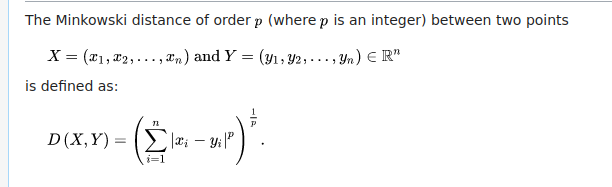

In [799]:
def minkowski_distance(x,y,p):
  return pow(np.sum(np.power(np.absolute(x-y),p)), 1/float(p))

### Algoritmo 2-aproximado para o problema dos k-centros

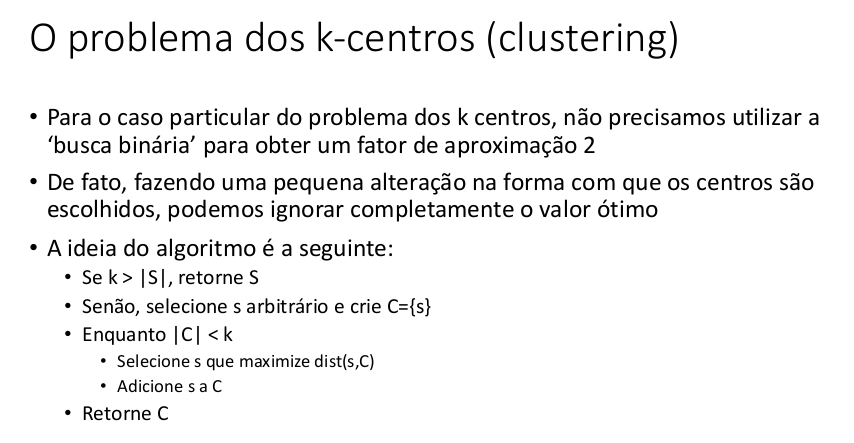

In [800]:
# Entrada: 
# Conjunto S de pontos = {s1, s2, s3, ..., sn}, 
# Número k de centros desejados, 
# Matriz de distâncias. dist[i,j] armazena a distancia definida previamente entre o ponto i e o ponto j

# Saída: 
# Conjunto de k pontos C = {c1, c2, c3, ..., ck} que particiona o conjunto S em k grupos

def encontra_k_centros(P,k,dist): 
  if k > len(P):
    return P

  distancias = dist.copy()
  S = P.copy()

  # Selecionando s arbitrário e adicionando nos centros
  s = np.random.randint(0,len(P))
  C = np.array(S[s])
  index_centros = np.array([s], dtype = int)
  raio = float("inf")  
  # Procurando s que maximiza dist(s,C)
  while len(C) < k:
    distancia_maxima = -1
    for s in range(len(P)):
      distancia_minima = float("inf")  
      for centro in index_centros:
        if dist[s][centro] < distancia_minima:
          distancia_minima = dist[s][centro]
          index = s
      if distancia_minima > distancia_maxima:
        distancia_maxima = distancia_minima
        index_max = index
    if distancia_maxima < raio:
          raio = distancia_maxima
    index_centros = np.append(index_centros, index_max)
    C = np.vstack([C, S[index_max]])

  label = np.zeros(len(P))
  for p in range(len(P)):
    label_dist = float("inf") 
    for centro in index_centros:
      if dist[p][centro] < label_dist:
        label_dist = dist[p][centro]
        index_label = centro
    label[p] = index_label
  raio = raio/2

  return C, index_centros, raio, label


##Lendo DataFrames

In [801]:
dataframe1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
dataframe2 = pd.read_csv('https://raw.githubusercontent.com/Gabrielmmf/DataFrames/main/online_shoppers_intention.csv')
dataframe3 = pd.read_csv('https://raw.githubusercontent.com/Gabrielmmf/DataFrames/main/dow_jones_index/dow_jones_index.data')
dataframe4 = pd.read_csv('https://raw.githubusercontent.com/Gabrielmmf/DataFrames/main/gesture_phase_dataset/a1_raw.csv')
dataframe5 = pd.read_csv('https://raw.githubusercontent.com/Gabrielmmf/DataFrames/main/e-shop%20data%20and%20description/e-shop%20clothing%202008.csv', sep = ";")
dataframe6 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ";")
dataframe7 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/egll.csv')
dataframe8 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/new1.csv')
dataframe9 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/RF-PCP-Full-dataset.csv')
dataframe10 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/Software%20Architecural%20Styles%20Dataset.csv')

## Testes com primeiro DataFrame

###Tratamento do DataFrame

In [802]:
df = dataframe1.copy(deep=True)

df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'Category 1' e 'Category 3'

In [803]:
df.rename(columns = {'Category 1':'Coluna 1', 'Category 3':'Coluna 2'}, inplace = True)

In [804]:
df = df[df['Coluna 1'] < 5]
df = df[df['Coluna 2'] < 5]
df = df[df['Coluna 1'] > 0]
df = df[df['Coluna 2'] > 0]
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=1000, random_state = 17)
df.head()

,Coluna 1,Coluna 2
3722,0.66,1.34
1411,1.71,2.91
3515,1.20,1.74
973,1.08,1.23
4358,0.96,1.72


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [805]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [806]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[1.   1.61]
 [4.59 3.92]
 [1.33 4.95]
 [3.36 2.22]
 [2.15 3.22]
 [0.75 3.63]
 [2.37 1.72]
 [4.43 2.66]
 [1.45 2.55]
 [0.66 0.73]] [231 786 686 616 324 215 763 796 508 514] 0.6100000000000001


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [807]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[0.81 1.28]
 [4.59 3.92]
 [1.21 4.96]
 [2.65 2.67]
 [0.93 3.02]
 [4.43 2.66]
 [2.07 1.61]
 [3.44 2.04]
 [0.93 4.02]
 [1.76 2.64]] [867 786 280 390 276 796 792 954 859 736] 0.4452527372178637


Encontrando ok K-centros com SciKit Learn

In [808]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [809]:
print(kmeans.cluster_centers_)

[[1.06504673 2.52130841]
 [1.40958333 1.48583333]
 [2.51567308 2.39451923]
 [0.9728     3.4516    ]
 [1.90343434 2.61060606]
 [0.75194245 1.35935252]
 [4.03941176 3.03529412]
 [1.28       4.48366667]
 [1.99843137 1.95127451]
 [1.08176471 1.83742647]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

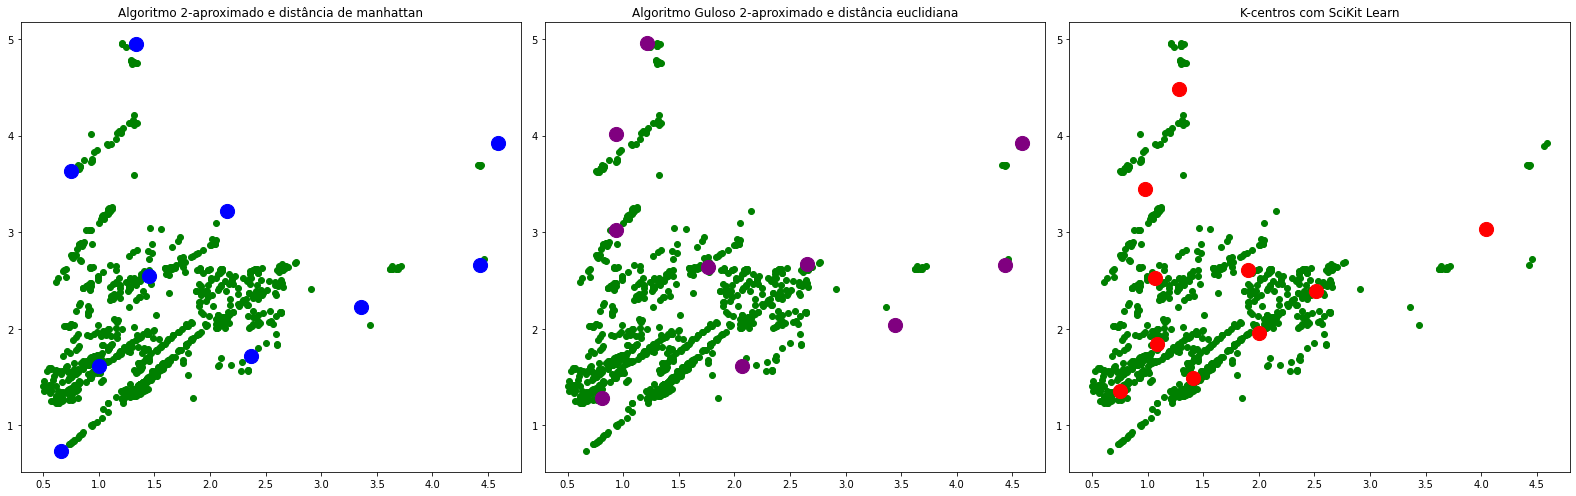

In [810]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

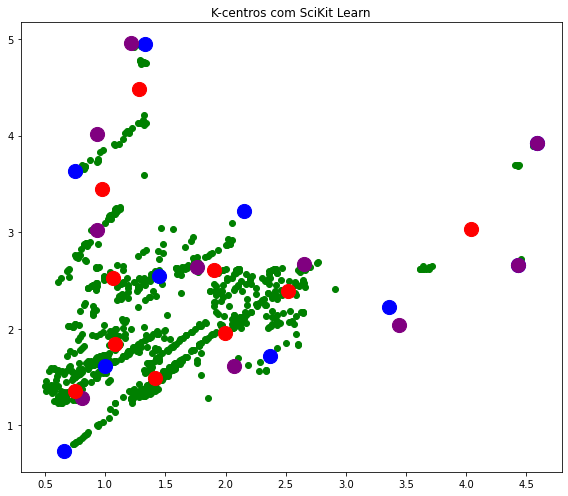

In [811]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [812]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.26821566110176104

### 30 Testes com centros aleatórios

In [813]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,0.560000,0.345789,0.460287,0.092941
0,2.0,0.436807,0.280564,0.364465,0.105258
0,1.0,0.560000,0.302534,0.425937,0.103029
0,2.0,0.436606,0.281091,0.364323,0.109908
0,1.0,0.655000,0.256072,0.535046,0.101192
0,2.0,0.498824,0.322741,0.410253,0.105139
0,1.0,0.575000,0.302246,0.468213,0.117970
0,2.0,0.483735,0.375438,0.451727,0.101220
0,1.0,0.615000,0.342926,0.438424,0.100893
0,2.0,0.457739,0.320713,0.430639,0.101750


Médias e desvio padrão

In [814]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,0.525712,0.074838,0.309189,0.034129,0.421753,0.049259,0.104904,0.006073


## Testes com segundo DataFrame

###Tratamento do DataFrame

In [815]:
df = dataframe2.copy(deep=True)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [816]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'BounceRates' e 'ExitRates'

In [817]:
df.rename(columns = {'BounceRates':'Coluna 1', 'ExitRates':'Coluna 2'}, inplace = True)

In [818]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=1000, random_state = 17)
df.head()

,Coluna 1,Coluna 2
6917,0.000000,0.006667
8878,0.007586,0.025532
958,0.000000,0.015385
2476,0.000000,0.008228
9515,0.000000,0.032194


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [819]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [820]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[0.         0.02857143]
 [0.2        0.2       ]
 [0.06428571 0.15      ]
 [0.         0.2       ]
 [0.08       0.07      ]
 [0.13125    0.16875   ]
 [0.025      0.1       ]
 [0.08888889 0.18888889]
 [0.1        0.11111111]
 [0.0375     0.05416667]] [719   8  98 396 889 714 281 782  24 683] 0.0291666665


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [821]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[0.         0.00714286]
 [0.2        0.2       ]
 [0.         0.2       ]
 [0.1        0.11111111]
 [0.         0.1       ]
 [0.08888889 0.18888889]
 [0.05       0.05555556]
 [0.13333333 0.15      ]
 [0.05       0.11      ]
 [0.         0.05333333]] [167   8 396  24   5 782 641 481 727 910] 0.023095237999999997


Encontrando ok K-centros com SciKit Learn

In [822]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [823]:
print(kmeans.cluster_centers_)

[[0.00148061 0.01125346]
 [0.19947917 0.19947917]
 [0.06597427 0.10133129]
 [0.02233019 0.04205657]
 [0.         0.2       ]
 [0.03807851 0.06697599]
 [0.00512093 0.02772953]
 [0.10524434 0.15222052]
 [0.00212551 0.09919028]
 [0.00158965 0.05602636]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

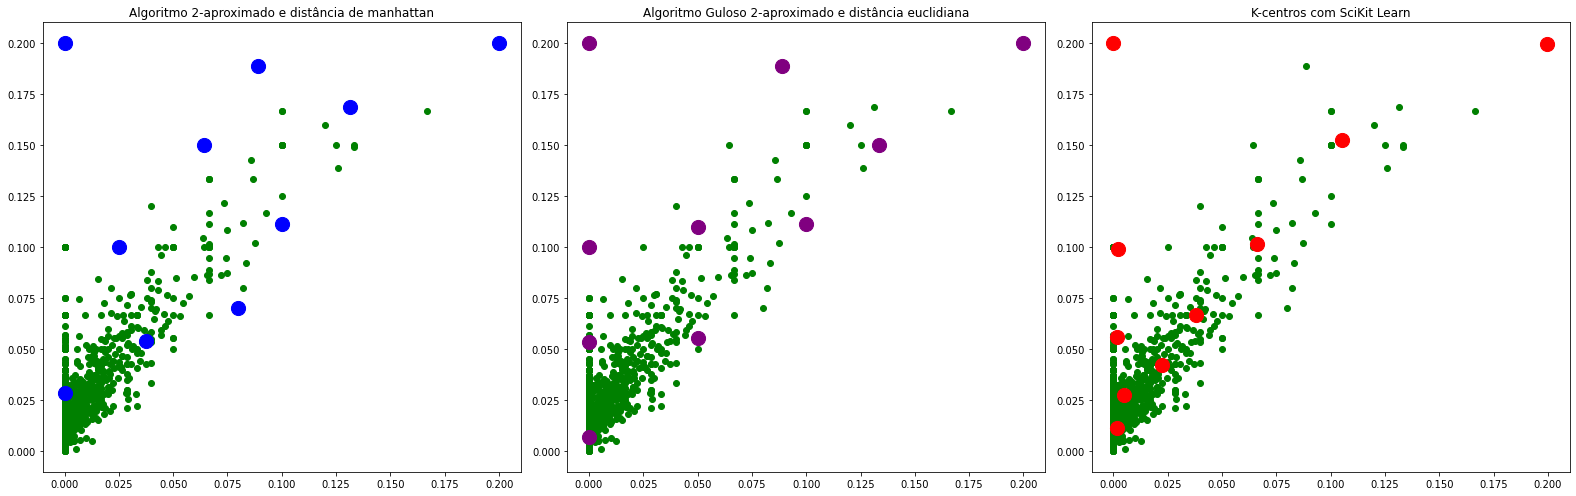

In [824]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

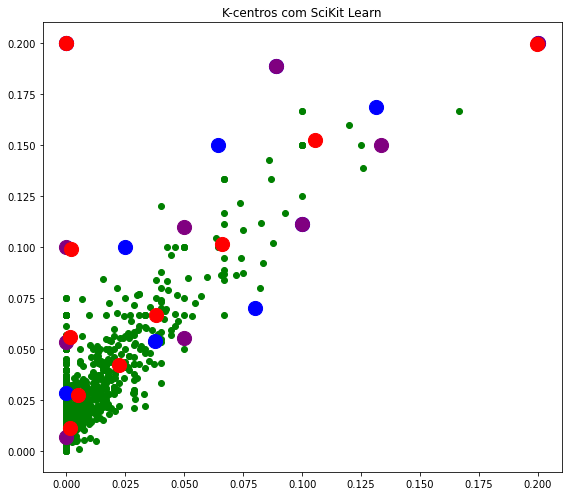

In [825]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [826]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.549954071726422

### 30 Testes com centros aleatórios

In [827]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,0.027390,0.432337,0.525954,0.130385
0,2.0,0.021237,0.620627,0.337173,0.111139
0,1.0,0.027143,0.607260,0.356564,0.177046
0,2.0,0.023283,0.513891,0.489257,0.175669
0,1.0,0.025000,0.585102,0.433312,0.176741
0,2.0,0.020307,0.558125,0.328449,0.199579
0,1.0,0.025000,0.585569,0.429587,0.180336
0,2.0,0.020000,0.476851,0.350192,0.174945
0,1.0,0.027143,0.604492,0.286817,0.181278
0,2.0,0.021237,0.621104,0.334646,0.175391


Médias e desvio padrão

In [828]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,0.024112,0.002756,0.557847,0.086824,0.384457,0.08839,0.128731,0.034721


## Testes com terceiro DataFrame

###Tratamento do DataFrame

In [829]:
df = dataframe3.copy(deep=True)

df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [830]:
df.describe()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000
mean,1.520000,1.175478e+08,0.050262,5.593627,1.173876e+08,0.238468,52.525333,0.691826
std,0.499933,1.584381e+08,2.517809,40.543478,1.592322e+08,2.679538,46.335098,0.305482
min,1.000000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,-15.422900,0.000000,0.065574
25%,1.000000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,-1.222068,24.000000,0.534549
50%,2.000000,5.306088e+07,0.000000,0.512586,5.294556e+07,0.101193,47.000000,0.681067
75%,2.000000,1.327218e+08,1.650888,21.800622,1.333230e+08,1.845562,69.000000,0.854291
max,2.000000,1.453439e+09,9.882230,327.408924,1.453439e+09,9.882230,336.000000,1.564210


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'percent_change_price' e 'percent_change_next_weeks_price'

In [831]:
df.rename(columns = {'percent_change_price':'Coluna 1', 'percent_change_next_weeks_price':'Coluna 2'}, inplace = True)

In [832]:
df

,quarter,stock,date,open,high,low,close,volume,Coluna 1,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,Coluna 2,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [833]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
652,1.899660,-0.719770
587,1.974270,0.293686
54,2.220930,-2.727450
630,-0.700280,1.027690
493,0.265252,-1.223080


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [834]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [835]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[  1.68287     3.00424  ]
 [  5.35117   -15.4229   ]
 [-15.4229      0.0530786]
 [ -5.50398    -4.5614   ]
 [  9.88223     8.32943  ]
 [  7.62174    -5.50398  ]
 [ -8.52713     3.72861  ]
 [ -0.931601  -10.4975   ]
 [ -1.59442     9.88223  ]
 [ -2.72727     0.0242072]] [458 404 518 376 522 524 356 488  79 692] 3.6811586000000003


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [836]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[  0.91047     1.53923  ]
 [  5.35117   -15.4229   ]
 [-15.4229      0.0530786]
 [  9.88223     8.32943  ]
 [  7.62174    -5.50398  ]
 [ -5.50398    -4.5614   ]
 [ -1.59442     9.88223  ]
 [ -8.52713     3.72861  ]
 [ -0.931601  -10.4975   ]
 [  8.32943     0.999131 ]] [633 404 518 522 524 376  79 356 488 125] 3.270752123534471


Encontrando ok K-centros com SciKit Learn

In [837]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [838]:
print(kmeans.cluster_centers_)

[[  3.88870213   2.66015043]
 [ -3.77728169  -1.28842599]
 [ -2.56813016   2.65361973]
 [ -0.03864677  -3.02816957]
 [  2.428166    -0.50331019]
 [ -0.55377229  -0.31153812]
 [  0.10726413   6.11065147]
 [  2.84676356  -6.66793389]
 [-10.571834     1.22324912]
 [  0.24872038   2.14717516]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

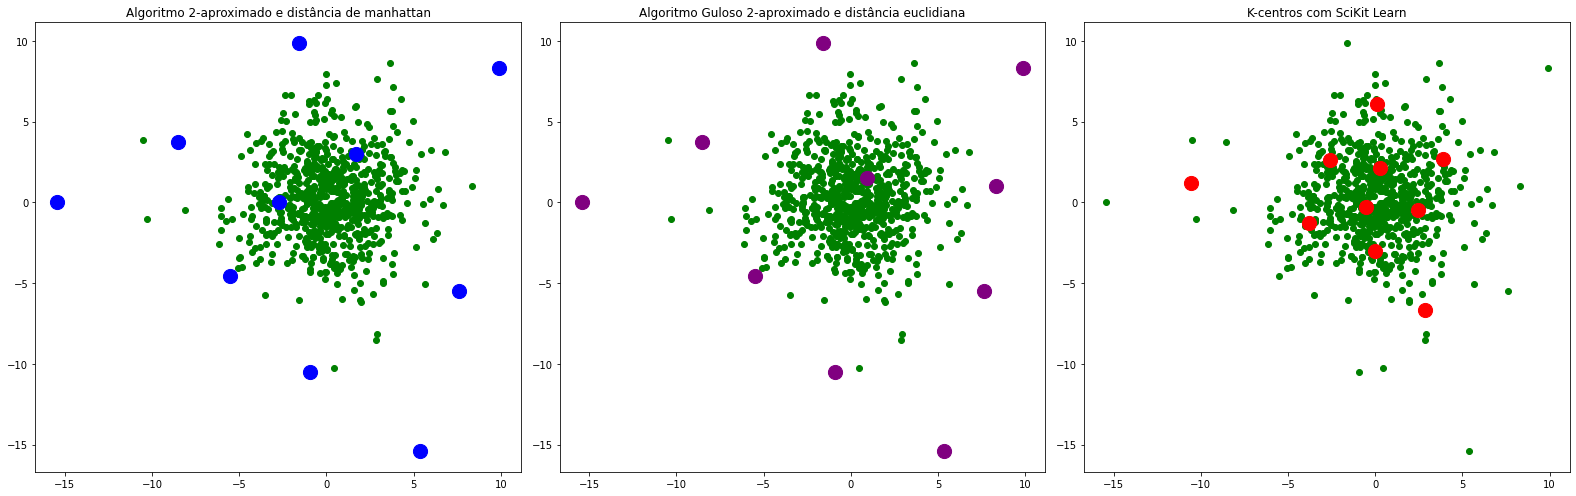

In [839]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

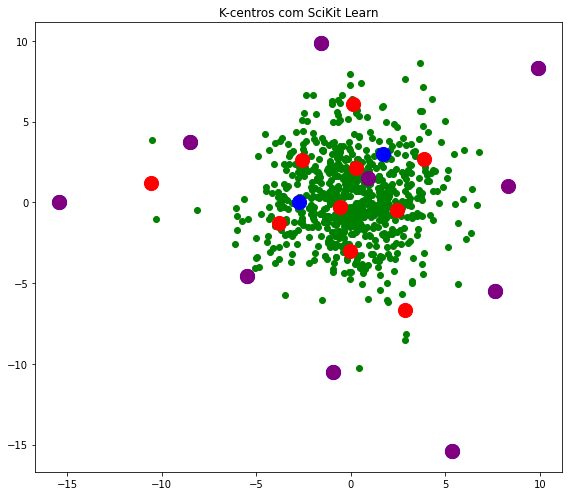

In [840]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [841]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.20085575364632208

### 30 Testes com centros aleatórios

In [842]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,4.345912,0.209842,0.138548,0.084578
0,2.0,3.118254,0.282619,0.240095,0.075330
0,1.0,4.157700,0.176461,0.103640,0.072559
0,2.0,3.270752,0.154853,0.079737,0.086403
0,1.0,4.097442,0.233410,0.250430,0.072513
0,2.0,3.073933,0.270887,0.321244,0.073018
0,1.0,4.485540,0.193802,0.123781,0.073566
0,2.0,3.033247,0.259666,0.226220,0.080301
0,1.0,4.157700,0.171755,0.099099,0.073356
0,2.0,3.028551,0.214281,0.258098,0.076751


Médias e desvio padrão

In [843]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,3.632493,0.595878,0.215568,0.036292,0.192471,0.088808,0.076339,0.004249


## Testes com quarto DataFrame

###Tratamento do DataFrame

In [844]:
df = dataframe4.copy(deep=True)

df.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest


In [845]:
df.describe()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp
count,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1.747000e+03
mean,4.733099,4.110179,1.492067,5.400730,3.860213,1.483939,5.084119,1.660346,1.753750,5.099306,4.264994,1.742626,4.584839,4.110311,1.521522,5.538275,3.902637,1.506997,5.739172e+06
std,0.706462,0.782359,0.064146,0.807955,0.870350,0.070478,0.181948,0.058347,0.024135,0.126167,0.061245,0.016544,0.622707,0.683990,0.061683,0.689032,0.786473,0.071968,2.796631e+04
min,1.712471,1.660291,1.183290,3.653736,1.296046,1.221158,4.435888,1.415457,1.664271,4.737700,3.992892,1.698297,1.969708,1.953082,1.245345,3.963918,1.643037,1.262197,5.702026e+06
25%,4.530557,3.698008,1.467770,4.846750,3.274578,1.458293,5.010395,1.632286,1.742879,5.041478,4.235906,1.734145,4.417056,3.816689,1.502152,5.084478,3.404305,1.478446,5.718500e+06
50%,4.870256,4.266777,1.487985,5.199142,4.122335,1.487003,5.073397,1.655894,1.757832,5.074966,4.272721,1.740951,4.717515,4.236164,1.531247,5.368165,4.146416,1.521121,5.734350e+06
75%,5.153918,4.737138,1.524848,5.817285,4.374306,1.517132,5.167158,1.678649,1.766783,5.141455,4.297685,1.748727,4.936841,4.602459,1.554412,5.845651,4.387562,1.544963,5.751136e+06
max,6.212834,5.414431,1.673418,8.546903,5.453834,1.722231,5.605544,1.965343,1.853095,5.586325,4.822887,1.811931,5.798482,5.142542,1.668777,8.266059,5.240774,1.719505,5.807537e+06


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'rhx' e 'rhy'

In [846]:
df.rename(columns = {'rhx':'Coluna 1', 'rhy':'Coluna 2'}, inplace = True)

In [847]:
df

,lhx,lhy,lhz,Coluna 1,Coluna 2,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,4.999737,3.840355,1.577457,4.990017,4.124610,1.546410,5.092207,1.616004,1.793314,5.094342,4.235239,1.776703,4.911455,4.145016,1.575040,5.121212,4.173772,1.590187,5807375,Rest
1743,5.001617,3.840771,1.577161,4.695521,4.148509,1.530205,5.092773,1.615753,1.793486,5.094236,4.235837,1.776754,4.913334,4.145438,1.574744,5.072464,4.175019,1.580585,5807406,Rest
1744,4.996975,3.841236,1.578423,4.700123,4.141193,1.530697,5.092515,1.615095,1.793637,5.093153,4.235420,1.776905,4.908689,4.145911,1.576006,5.074112,4.178266,1.581682,5807437,Rest
1745,5.000125,3.841455,1.577914,4.690338,4.153884,1.526481,5.092476,1.614777,1.793768,5.093362,4.234446,1.777077,4.911839,4.146133,1.575497,5.058132,4.166863,1.579690,5807499,Rest


In [848]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
512,5.744053,3.419758
1122,4.569516,3.170977
1626,5.146437,3.897637
810,3.877943,3.717657
1319,5.446877,4.034132


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [849]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [850]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[4.898448 4.128129]
 [6.939569 1.48636 ]
 [8.228351 3.021914]
 [3.966405 2.46807 ]
 [5.977349 2.851618]
 [6.567486 4.540385]
 [4.825959 1.827619]
 [5.471795 5.024178]
 [3.877943 3.717657]
 [7.291252 2.643064]] [115 176 384 469 555 445 437 641   3 120] 0.6579745000000001


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [851]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[4.969455 4.187739]
 [8.228968 3.020815]
 [5.901096 1.579333]
 [3.966405 2.46807 ]
 [6.835827 4.197144]
 [5.925758 3.061422]
 [7.072834 2.159915]
 [4.922213 5.451211]
 [3.877943 3.717657]
 [5.041571 2.401082]] [347 130 452 469 393 300 550 154   3 472] 0.5386254077974787


Encontrando ok K-centros com SciKit Learn

In [852]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [853]:
print(kmeans.cluster_centers_)

[[5.11239348 2.62025517]
 [5.43663388 4.39270389]
 [6.49841003 2.67889827]
 [6.27651524 3.88550044]
 [4.28977735 3.2723638 ]
 [6.13773865 1.63827177]
 [7.94874315 2.99447748]
 [5.44584106 3.57215915]
 [4.92426746 5.0535304 ]
 [4.79195502 4.2703712 ]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

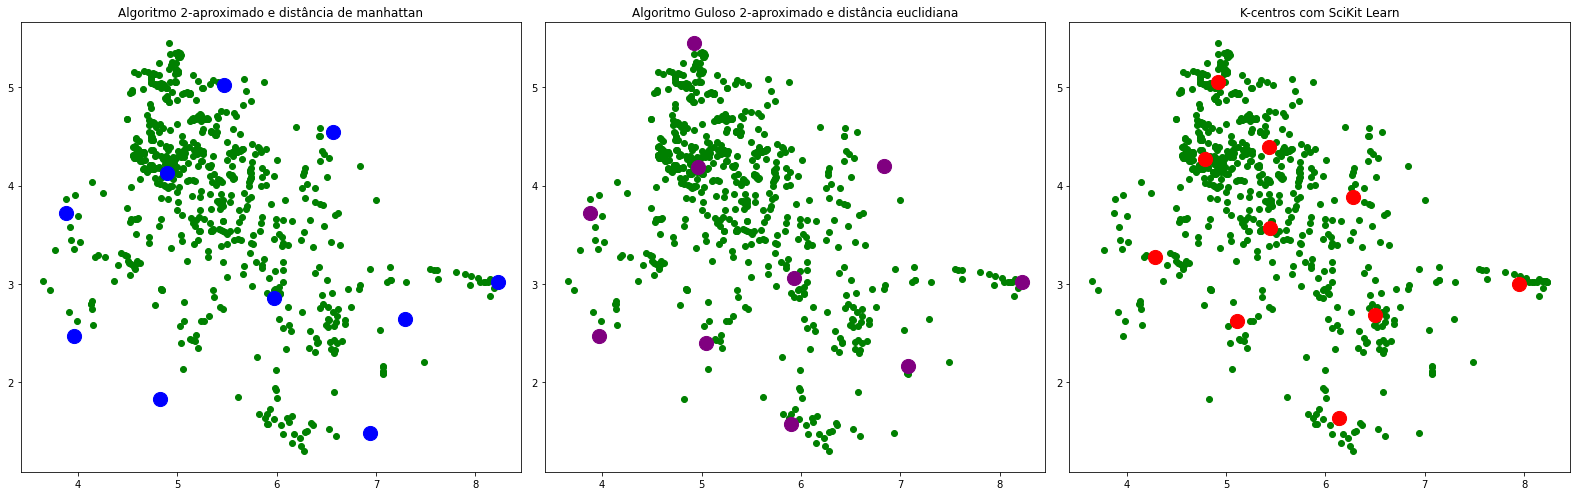

In [854]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

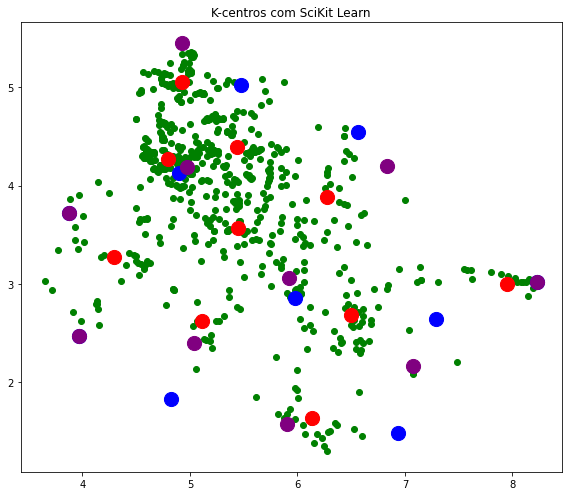

In [855]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [856]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.3197699935638953

### 30 Testes com centros aleatórios

In [857]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,0.705732,0.248208,0.281993,0.076159
0,2.0,0.521313,0.311928,0.390237,0.077347
0,1.0,0.697803,0.303748,0.414710,0.080986
0,2.0,0.496094,0.428692,0.821464,0.087997
0,1.0,0.634929,0.258949,0.352551,0.079106
0,2.0,0.549952,0.328265,0.423127,0.077244
0,1.0,0.677274,0.315218,0.423515,0.076555
0,2.0,0.535329,0.359370,0.592628,0.081405
0,1.0,0.708742,0.267607,0.349446,0.072837
0,2.0,0.591508,0.332483,0.440747,0.075542


Médias e desvio padrão

In [858]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,0.605221,0.079654,0.313387,0.040788,0.447151,0.106536,0.077492,0.003726


## Testes com quinto DataFrame

###Tratamento do DataFrame

In [859]:
df = dataframe5.copy(deep=True)

df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [860]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'day' e 'country'

In [861]:
df.rename(columns = {'day':'Coluna 1', 'country':'Coluna 2'}, inplace = True)

In [862]:
df

,year,month,Coluna 1,order,Coluna 2,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [863]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
20947,11,29
59889,11,46
50526,3,29
114753,29,29
95623,11,29


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [864]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [865]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[16 29]
 [ 1  3]
 [31  9]
 [30 46]
 [ 4 44]
 [13 10]
 [ 2 21]
 [28 24]
 [18 44]
 [12 37]] [414 248 339 489 537 117 642 160 636 400] 6.0


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [866]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[23 29]
 [ 1  3]
 [ 4 46]
 [31  9]
 [30 46]
 [ 2 21]
 [15  9]
 [17 46]
 [12 34]
 [31 21]] [410 248 481 339 489 642 227 396 453  82] 5.656854249492381


Encontrando ok K-centros com SciKit Learn

In [867]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [868]:
print(kmeans.cluster_centers_)

[[ 3.34265734 28.97202797]
 [22.13669065 28.84892086]
 [15.08823529  9.17647059]
 [15.69672131 28.59016393]
 [23.2        44.73333333]
 [ 3.56666667  8.4       ]
 [26.12        9.84      ]
 [28.40740741 28.77777778]
 [ 9.59459459 28.91216216]
 [ 8.61538462 43.        ]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

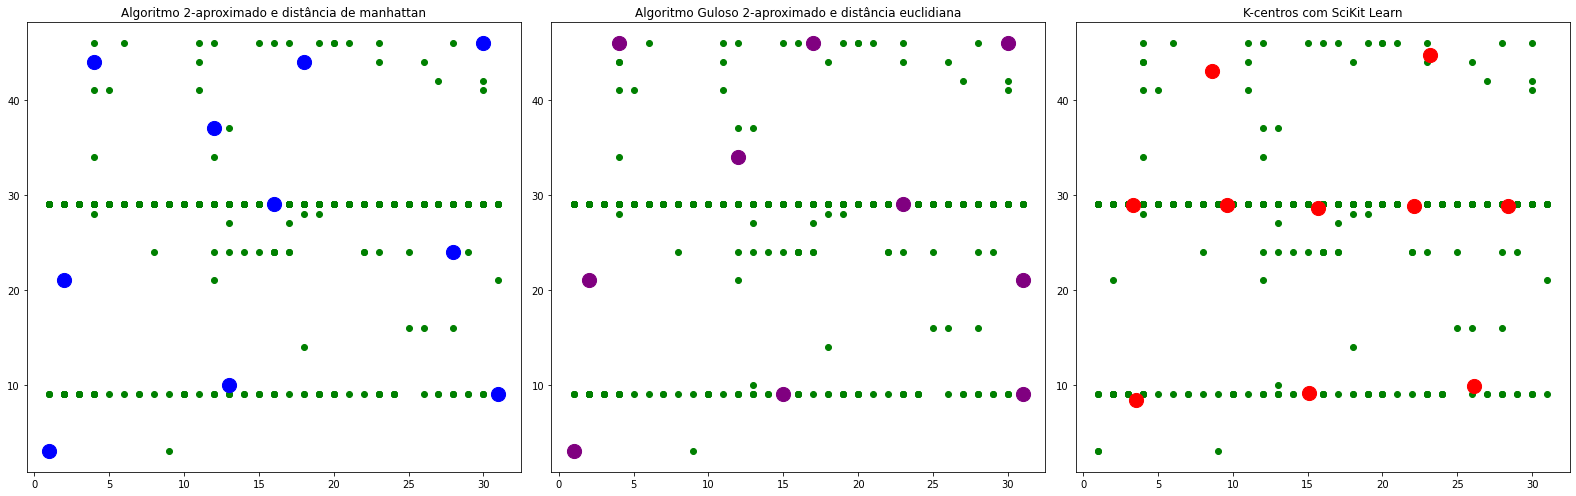

In [869]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

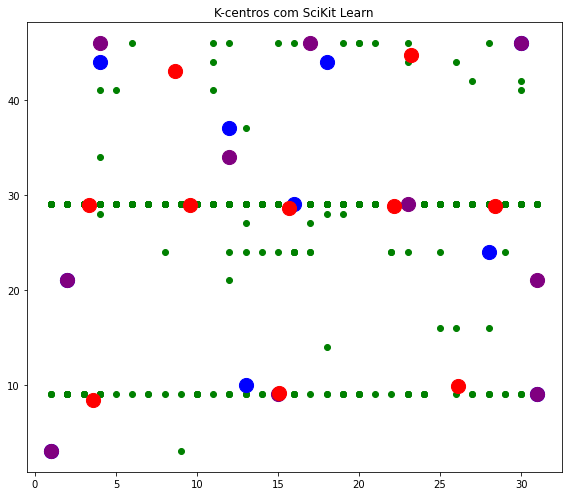

In [870]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [871]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.3275195998597277

### 30 Testes com centros aleatórios

In [872]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,6.000000,0.503732,0.595532,0.080432
0,2.0,4.716991,0.496922,0.496835,0.073507
0,1.0,6.500000,0.459109,0.437824,0.072041
0,2.0,4.743416,0.516463,0.582785,0.082575
0,1.0,6.500000,0.353717,0.443286,0.072897
0,2.0,5.000000,0.496922,0.496835,0.074862
0,1.0,5.500000,0.387979,0.565374,0.077636
0,2.0,4.743416,0.432978,0.599743,0.078022
0,1.0,6.500000,0.320534,0.460392,0.079152
0,2.0,5.220153,0.516460,0.530047,0.083428


Médias e desvio padrão

In [873]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,5.728345,0.645462,0.440583,0.055234,0.500877,0.063434,0.078905,0.005448


## Testes com sexto DataFrame

###Tratamento do DataFrame

In [874]:
df = dataframe6.copy(deep=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [875]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'volatile acidity' e 'citric acid'

In [876]:
df.rename(columns = {'volatile acidity':'Coluna 1', 'citric acid':'Coluna 2'}, inplace = True)

In [877]:
df

,fixed acidity,Coluna 1,Coluna 2,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [878]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
114,0.56,0.19
667,0.34,0.45
1253,0.66,0.00
338,0.49,0.58
921,0.36,0.32


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [879]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [880]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[0.6  0.03]
 [0.52 1.  ]
 [1.58 0.  ]
 [0.12 0.45]
 [1.01 0.66]
 [1.18 0.21]
 [0.58 0.54]
 [0.36 0.24]
 [0.76 0.29]
 [0.3  0.68]] [371 564 110 273 271  10 432 309  13 610] 0.20500000000000002


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [881]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[0.59 0.44]
 [1.58 0.  ]
 [0.98 0.01]
 [0.52 1.  ]
 [0.34 0.  ]
 [1.01 0.66]
 [0.12 0.45]
 [1.24 0.34]
 [0.37 0.69]
 [0.67 0.12]] [142 110 286 564 578 271 273 392 708 316] 0.16446884203398524


Encontrando ok K-centros com SciKit Learn

In [882]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [883]:
print(kmeans.cluster_centers_)

[[0.72792553 0.03723404]
 [0.2969802  0.43584158]
 [0.45238095 0.45666667]
 [0.54817708 0.25604167]
 [0.64275    0.663     ]
 [1.06086957 0.1026087 ]
 [0.55288889 0.06466667]
 [0.38231707 0.2502439 ]
 [0.37872727 0.60563636]
 [0.7245     0.25216667]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

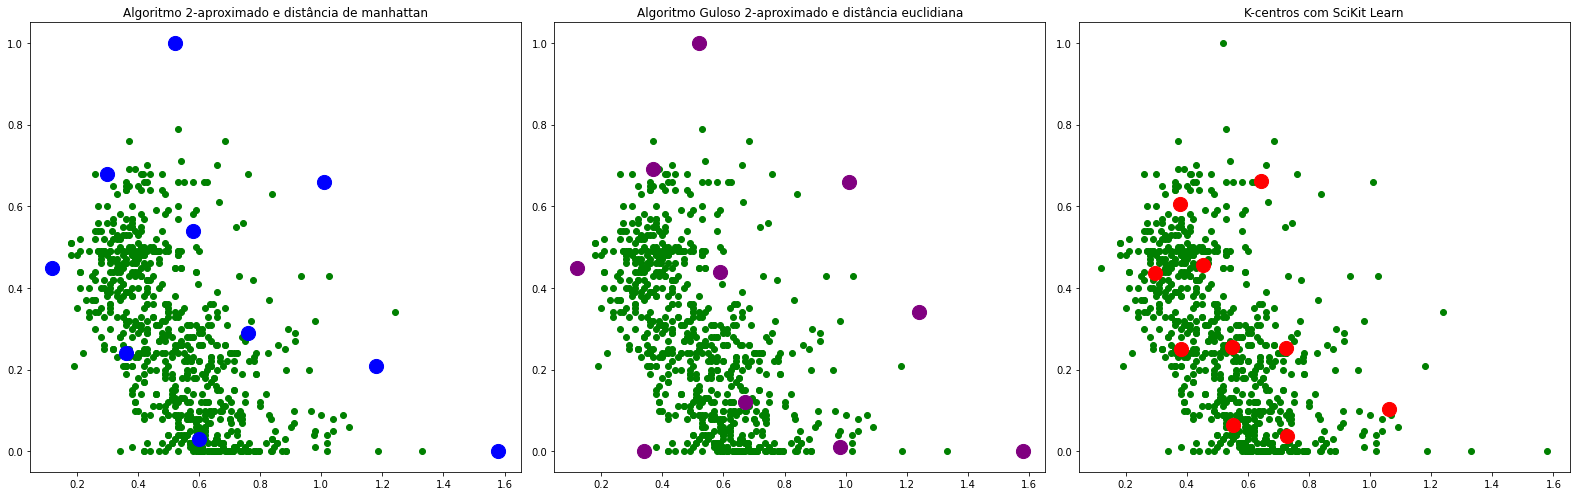

In [884]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

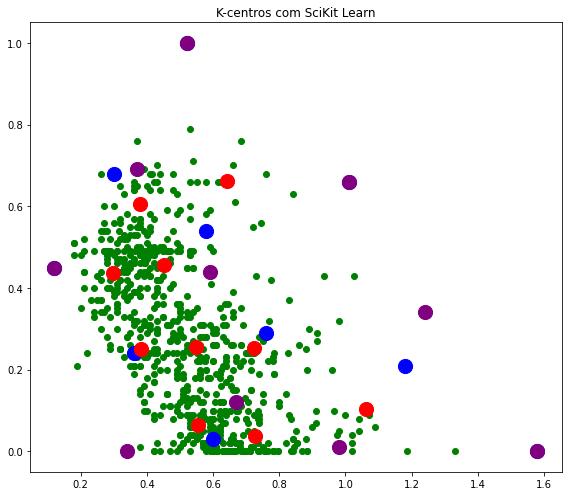

In [885]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [886]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.2721552276452927

### 30 Testes com centros aleatórios

In [887]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,0.185000,0.156073,0.284311,0.076015
0,2.0,0.150083,0.196429,0.293315,0.074036
0,1.0,0.197500,0.212605,0.401922,0.075763
0,2.0,0.156205,0.285635,0.324552,0.077734
0,1.0,0.202500,0.176263,0.285804,0.078864
0,2.0,0.156205,0.278044,0.377154,0.073984
0,1.0,0.195000,0.215209,0.394164,0.074407
0,2.0,0.146031,0.297744,0.437323,0.081316
0,1.0,0.182500,0.256671,0.419452,0.077402
0,2.0,0.153052,0.270528,0.275209,0.075270


Médias e desvio padrão

In [888]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,0.173458,0.024718,0.243198,0.049036,0.348659,0.066567,0.07708,0.003851


## Testes com sétimo DataFrame

###Tratamento do DataFrame

In [889]:
df = dataframe7.copy(deep=True)

df.head()

,metar_press,metar_rh,metar_temp,metar_wind_dir,metar_wind_spd,gfs_press,gfs_rh,gfs_temp,gfs_wind_dir,gfs_wind_spd,time,date
0,1025.0,75.50,6.0,300.0,2.57,1016.09,91.5,3.11,278.0,3.33,03:00,2011-01-01
1,1024.0,80.92,5.0,270.0,4.12,1015.76,95.5,3.15,288.0,2.91,06:00,2011-01-01
2,1024.0,80.92,5.0,290.0,2.57,1015.12,96.8,3.71,304.0,3.52,09:00,2011-01-01
3,1024.0,86.99,6.0,320.0,2.57,1015.97,92.7,5.76,338.0,3.13,12:00,2011-01-01
4,1024.0,87.09,7.0,340.0,2.06,1015.65,97.3,4.87,2.0,3.36,15:00,2011-01-01


In [890]:
df.describe()

,metar_press,metar_rh,metar_temp,metar_wind_dir,metar_wind_spd,gfs_press,gfs_rh,gfs_temp,gfs_wind_dir,gfs_wind_spd
count,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000
mean,1015.254033,76.353163,11.204349,198.510638,4.128631,1007.137111,85.685258,9.676288,192.787819,3.890116
std,10.375252,15.484956,6.017423,97.145405,2.099651,10.230565,13.811424,6.158555,95.746546,1.846226
min,975.000000,19.930000,-7.000000,0.000000,0.000000,967.260000,28.200000,-9.440000,0.000000,0.070000
25%,1009.000000,67.550000,7.000000,110.000000,2.570000,1001.190000,78.400000,5.262500,120.000000,2.590000
50%,1016.000000,80.920000,11.000000,220.000000,3.600000,1007.630000,91.400000,9.650000,211.000000,3.640000
75%,1022.000000,87.537500,15.000000,270.000000,5.140000,1013.987500,96.200000,13.850000,260.750000,4.940000
max,1043.000000,100.000000,33.000000,360.000000,15.430000,1034.270000,100.000000,31.250000,359.000000,14.250000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'metar_rh 	' e 'gfs_rh'

In [891]:
df.rename(columns = {'metar_rh':'Coluna 1', 'gfs_rh':'Coluna 2'}, inplace = True)

In [892]:
df

,metar_press,Coluna 1,metar_temp,metar_wind_dir,metar_wind_spd,gfs_press,Coluna 2,gfs_temp,gfs_wind_dir,gfs_wind_spd,time,date
0,1025.0,75.50,6.0,300.0,2.57,1016.09,91.5,3.11,278.0,3.33,03:00,2011-01-01
1,1024.0,80.92,5.0,270.0,4.12,1015.76,95.5,3.15,288.0,2.91,06:00,2011-01-01
2,1024.0,80.92,5.0,290.0,2.57,1015.12,96.8,3.71,304.0,3.52,09:00,2011-01-01
3,1024.0,86.99,6.0,320.0,2.57,1015.97,92.7,5.76,338.0,3.13,12:00,2011-01-01
4,1024.0,87.09,7.0,340.0,2.06,1015.65,97.3,4.87,2.0,3.36,15:00,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
8549,1001.0,87.28,9.0,250.0,8.75,993.25,93.8,8.80,192.0,5.90,12:00,2013-12-31
8550,1002.0,93.35,7.0,180.0,4.63,993.28,96.6,6.89,218.0,3.42,15:00,2013-12-31
8551,1002.0,86.99,6.0,200.0,5.14,994.56,92.6,5.04,183.0,4.84,18:00,2013-12-31
8552,1003.0,81.06,6.0,170.0,3.09,994.64,89.0,4.49,186.0,5.63,21:00,2013-12-31


In [893]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
5088,100.00,87.9
826,76.34,94.8
6350,69.23,95.9
1489,87.65,85.8
4278,87.84,99.0


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [894]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [895]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[ 88.1   94.3 ]
 [ 19.93  38.1 ]
 [ 52.54  67.6 ]
 [ 82.38  53.6 ]
 [ 30.22  80.7 ]
 [ 56.91  97.  ]
 [ 45.66  43.5 ]
 [ 71.65  80.  ]
 [100.    78.8 ]
 [ 33.31  57.  ]] [394 439 704 146 620  28 264 353 695 726] 12.924999999999997


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [896]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[ 42.87  53.2 ]
 [100.    98.7 ]
 [ 54.87  95.7 ]
 [ 82.38  53.6 ]
 [ 30.22  80.7 ]
 [ 19.93  38.1 ]
 [ 76.99  80.  ]
 [ 61.51  65.  ]
 [ 75.67 100.  ]
 [100.    78.8 ]] [297 207 364 146 620 439 591 744 725 695] 9.950000000000003


Encontrando ok K-centros com SciKit Learn

In [897]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [898]:
print(kmeans.cluster_centers_)

[[69.00356322 80.93333333]
 [85.66935484 96.11935484]
 [39.19647059 50.04705882]
 [53.60938776 60.62040816]
 [76.83014925 91.48880597]
 [58.78809524 92.01904762]
 [71.44576271 66.6559322 ]
 [94.30920354 96.75575221]
 [45.27090909 73.93030303]
 [90.1        84.85      ]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

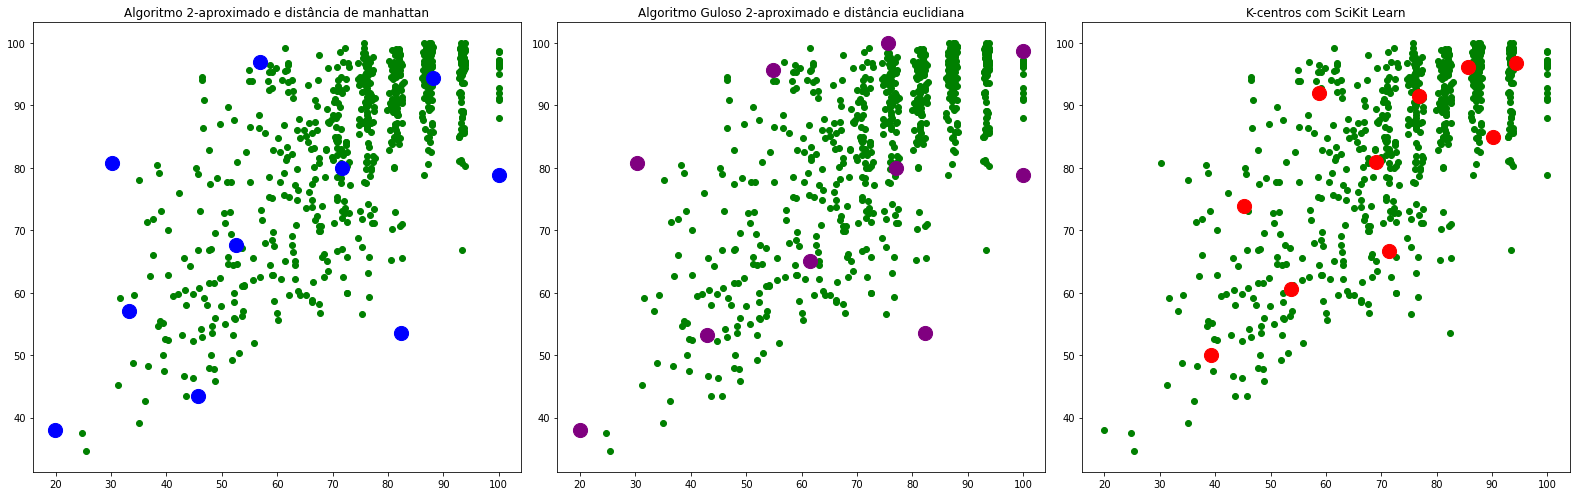

In [899]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

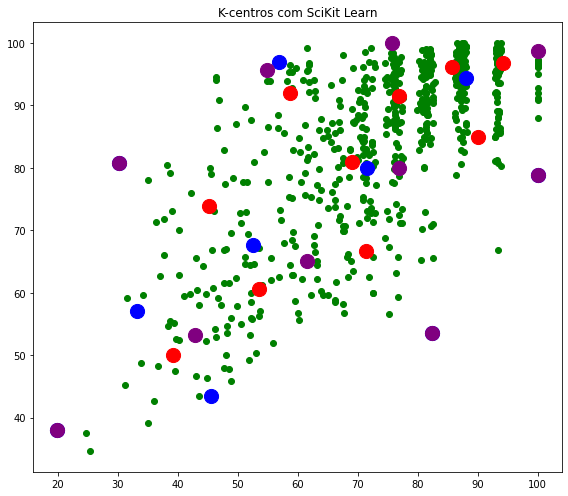

In [900]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [901]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.3193422512146612

### 30 Testes com centros aleatórios

In [902]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,12.075000,0.307596,0.441944,0.074350
0,2.0,8.932307,0.312162,0.350788,0.086594
0,1.0,11.955000,0.357625,0.441438,0.080108
0,2.0,9.495836,0.278540,0.349757,0.076365
0,1.0,11.900000,0.301771,0.416253,0.075525
0,2.0,8.621370,0.309118,0.383628,0.074446
0,1.0,12.085000,0.347286,0.427658,0.077013
0,2.0,8.230014,0.278950,0.361595,0.077380
0,1.0,11.120000,0.320594,0.400864,0.076313
0,2.0,9.691878,0.303183,0.398765,0.073607


Médias e desvio padrão

In [903]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,10.623507,1.497862,0.312737,0.026854,0.42388,0.065056,0.078185,0.005282


## Testes com oitavo DataFrame

###Tratamento do DataFrame

In [904]:
df = dataframe8.copy(deep=True)

df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,yt,y6-y1/x6-x1,y6-y3/x6-x3,y6-y5/x6-x5,y6-y1/5,y6-y3/3,y6-y5/1,x6-x1/5,x6-x3/3,x6-x5/1
0,969,302,969,302,969,302,918,244,870,94,...,73,1.521429,1.521429,0.121951,-42.6,-71.000000,-5,-28.0,-46.666667,-41
1,969,302,969,302,918,244,870,94,829,89,...,111,1.526667,1.727273,1.600000,-45.8,-57.000000,-16,-30.0,-33.000000,-10
2,969,302,918,244,870,94,829,89,819,73,...,93,11.937500,0.204819,0.283582,-38.2,5.666667,38,-3.2,27.666667,134
3,918,244,870,94,829,89,819,73,953,111,...,92,-1.086331,0.017544,-0.173077,-30.2,1.333333,-18,27.8,76.000000,104
4,870,94,829,89,819,73,953,111,1057,93,...,71,-0.010695,0.079832,99999.000000,-0.4,6.333333,-1,37.4,79.333333,0


In [905]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,yt,y6-y1/x6-x1,y6-y3/x6-x3,y6-y5/x6-x5,y6-y1/5,y6-y3/3,y6-y5/1,x6-x1/5,x6-x3/3,x6-x5/1
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,...,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,644.234341,343.924255,644.195217,343.943366,644.172003,343.975485,644.150891,344.019011,644.135681,344.069842,...,344.177006,24034.601054,30318.236975,45136.668183,0.042285,0.053399,0.065840,-0.021813,-0.015576,-0.010406
std,383.313629,193.982120,383.300432,193.987398,383.287784,194.007026,383.275700,194.046401,383.267848,194.086729,...,194.103134,42730.724118,45964.926612,49764.917088,37.396516,51.392309,87.668749,62.979587,88.492861,152.425781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-254.000000,-197.000000,-213.000000,-153.400000,-255.666667,-733.000000,-271.600000,-454.666667,-1325.000000
25%,363.250000,198.000000,363.250000,198.000000,363.250000,198.000000,363.250000,198.000000,363.250000,198.000000,...,198.000000,-0.228662,-0.149457,0.000000,-9.800000,-7.666667,-1.000000,-14.200000,-9.000000,-2.000000
50%,555.000000,355.000000,555.000000,355.000000,555.000000,355.000000,555.000000,355.000000,555.000000,355.000000,...,355.000000,0.447853,0.642631,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,881.000000,468.000000,881.000000,468.000000,881.000000,468.000000,880.750000,468.000000,880.000000,468.000000,...,468.000000,31.237500,99999.000000,99999.000000,10.800000,10.666667,6.000000,16.000000,13.000000,2.000000
max,1365.000000,767.000000,1365.000000,767.000000,1365.000000,767.000000,1365.000000,767.000000,1365.000000,767.000000,...,767.000000,99999.000000,99999.000000,99999.000000,153.400000,255.666667,767.000000,263.600000,454.666667,1206.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'x1' e 'y1'

In [906]:
df.rename(columns = {'x1':'Coluna 1', 'y1':'Coluna 2'}, inplace = True)

In [907]:
df

,Coluna 1,Coluna 2,x2,y2,x3,y3,x4,y4,x5,y5,...,yt,y6-y1/x6-x1,y6-y3/x6-x3,y6-y5/x6-x5,y6-y1/5,y6-y3/3,y6-y5/1,x6-x1/5,x6-x3/3,x6-x5/1
0,969,302,969,302,969,302,918,244,870,94,...,73,1.521429,1.521429,0.121951,-42.6,-71.000000,-5,-28.0,-46.666667,-41
1,969,302,969,302,918,244,870,94,829,89,...,111,1.526667,1.727273,1.600000,-45.8,-57.000000,-16,-30.0,-33.000000,-10
2,969,302,918,244,870,94,829,89,819,73,...,93,11.937500,0.204819,0.283582,-38.2,5.666667,38,-3.2,27.666667,134
3,918,244,870,94,829,89,819,73,953,111,...,92,-1.086331,0.017544,-0.173077,-30.2,1.333333,-18,27.8,76.000000,104
4,870,94,829,89,819,73,953,111,1057,93,...,71,-0.010695,0.079832,99999.000000,-0.4,6.333333,-1,37.4,79.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,578,493,578,493,578,493,578,493,578,493,...,623,99999.000000,99999.000000,99999.000000,0.0,0.000000,0,0.0,0.000000,0
9990,578,493,578,493,578,493,578,493,578,493,...,737,0.817610,0.817610,0.817610,26.0,43.333333,130,31.8,53.000000,159
9991,578,493,578,493,578,493,578,493,737,623,...,752,1.355556,1.355556,5.428571,48.8,81.333333,114,36.0,60.000000,21
9992,578,493,578,493,578,493,737,623,758,737,...,752,1.377660,1.377660,1.875000,51.8,86.333333,15,37.6,62.666667,8


In [908]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
2683,1353,433
4781,379,12
4039,449,393
7804,89,6
1850,1365,549


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [909]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [910]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[ 528  189]
 [1365  767]
 [   0  767]
 [1246    9]
 [   0    0]
 [ 873  552]
 [ 242  449]
 [ 824   38]
 [1054  287]
 [ 548  651]] [399 658 218 461 322  80 236 412 593 537] 212.0


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [911]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[ 826  532]
 [   0    0]
 [   0  767]
 [1358    5]
 [1365  767]
 [ 553    0]
 [ 302  402]
 [ 956  130]
 [1364  386]
 [ 613  308]] [ 51 322 218 237 658 440 465 649  19 294] 154.5517712612832


Encontrando ok K-centros com SciKit Learn

In [912]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [913]:
print(kmeans.cluster_centers_)

[[ 359.45061728  385.56790123]
 [1265.5625      201.90625   ]
 [ 434.21621622   75.02702703]
 [ 650.63492063  625.61904762]
 [1338.47761194  518.80597015]
 [ 868.57446809  135.72340426]
 [ 922.04615385  502.15384615]
 [ 589.71559633  356.62385321]
 [ 150.45901639   92.44262295]
 [ 154.52631579  538.10526316]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

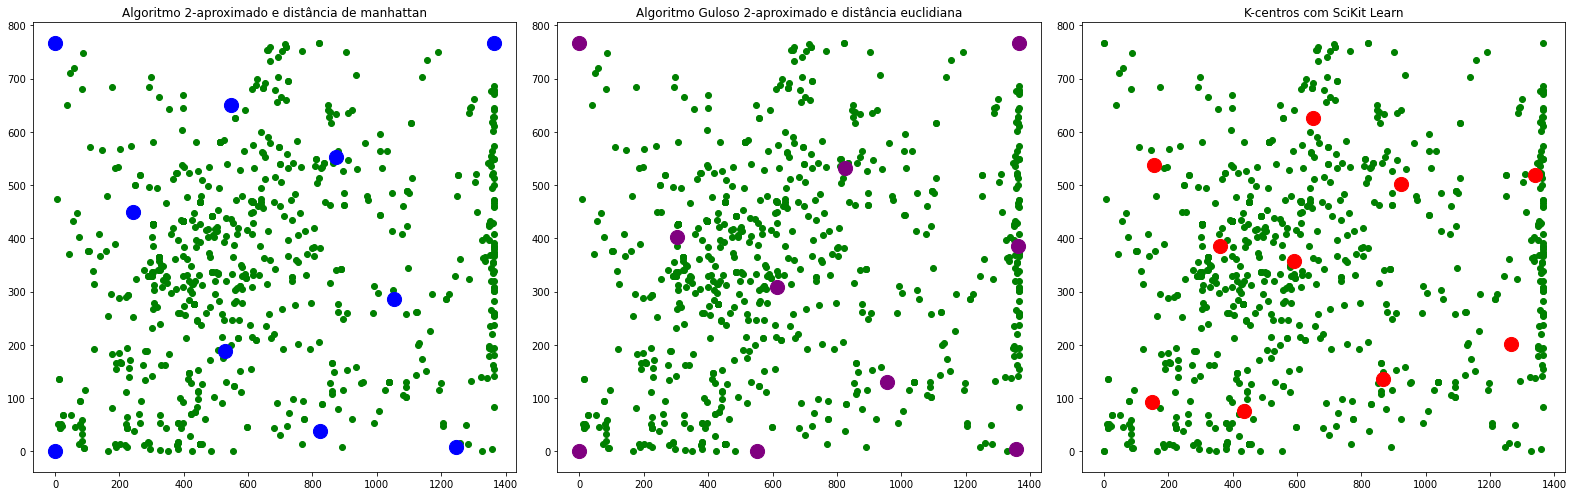

In [914]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

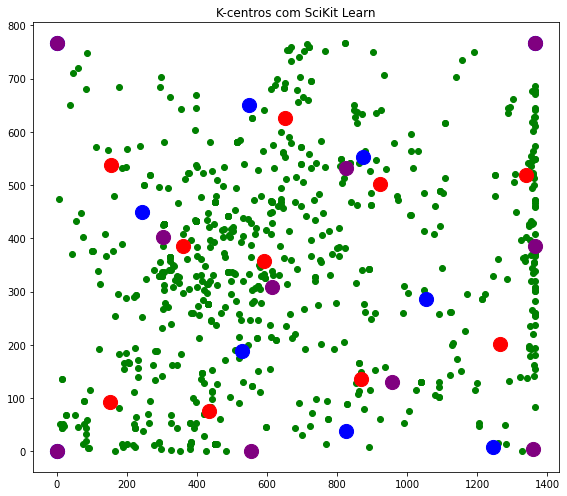

In [915]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [916]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.31069864497450156

### 30 Testes com centros aleatórios

In [917]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,227.500000,0.261123,0.402285,0.080940
0,2.0,187.046117,0.340335,0.519598,0.075934
0,1.0,219.000000,0.267384,0.425082,0.076830
0,2.0,188.510610,0.281751,0.486177,0.074051
0,1.0,204.500000,0.357638,0.491639,0.076688
0,2.0,171.261496,0.251692,0.487663,0.075366
0,1.0,239.000000,0.281548,0.385543,0.078096
0,2.0,152.764525,0.365541,0.567744,0.075333
0,1.0,218.500000,0.307893,0.463445,0.075622
0,2.0,161.307935,0.288273,0.469754,0.080869


Médias e desvio padrão

In [918]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,194.614416,25.106923,0.312655,0.035321,0.481748,0.072216,0.078505,0.003524


## Testes com nono DataFrame

###Tratamento do DataFrame

In [919]:
df = dataframe9.copy(deep=True)

df.head()

,PDB-ID,RMSD,TM,GDT,Area,ED,Energy,SS,SL,PN
0,CASP10_T0719_PconsD_TS5.pdb,47.831,0.1579,0.0696,66819.2,1102620.0,158502.0,314,726,18672
1,CASP10_T0719_slbio_TS3.pdb,41.465,0.2326,0.1092,62223.6,1264920.0,-1706.3,299,726,18672
2,CASP10_T0719_PconsD_TS1.pdb,42.539,0.1394,0.0738,57529.9,1075100.0,8785720.0,287,726,18672
3,CASP10_T0713_PconsD_TS2.pdb,20.482,0.3892,0.2453,57343.9,1003390.0,208374.0,185,739,20860
4,CASP10_T0713_RBO-MBS-BB_TS4.pdb,38.233,0.1589,0.0595,56776.6,1045490.0,-12058.8,214,739,20860


In [920]:
df.describe()

,RMSD,TM,GDT,Area,ED,Energy,SS,SL,PN
count,99987.000000,99987.000000,99987.000000,99987.000000,9.998700e+04,9.998700e+04,99987.000000,99987.000000,99987.000000
mean,10.030393,0.426277,0.424736,8238.653763,3.008802e+04,1.652539e+08,60.459710,130.939762,1186.866653
std,6.338387,0.252749,0.236601,4628.444356,7.680962e+04,7.185927e+09,61.716943,94.947702,2212.317599
min,0.000000,0.011600,0.011600,2453.470000,0.000000e+00,-1.262600e+07,0.000000,24.000000,0.000000
25%,5.651000,0.236800,0.253200,4971.900000,2.863045e+03,-1.138320e+03,21.000000,70.000000,202.000000
50%,10.000000,0.310400,0.342100,6966.170000,6.594400e+03,-1.414600e+02,38.000000,99.000000,424.000000
75%,13.399000,0.592000,0.566600,9768.235000,2.062185e+04,2.144850e+03,76.000000,151.000000,1014.000000
max,130.014000,1.000000,1.000000,66819.200000,2.426140e+06,6.981300e+11,533.000000,986.000000,52210.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'TM' e 'GDT'

In [921]:
df.rename(columns = {'TM':'Coluna 1', 'GDT':'Coluna 2'}, inplace = True)

In [922]:
df

,PDB-ID,RMSD,Coluna 1,Coluna 2,Area,ED,Energy,SS,SL,PN
0,CASP10_T0719_PconsD_TS5.pdb,47.831,0.1579,0.0696,66819.20,1.102620e+06,158502.000,314,726,18672
1,CASP10_T0719_slbio_TS3.pdb,41.465,0.2326,0.1092,62223.60,1.264920e+06,-1706.300,299,726,18672
2,CASP10_T0719_PconsD_TS1.pdb,42.539,0.1394,0.0738,57529.90,1.075100e+06,8785720.000,287,726,18672
3,CASP10_T0713_PconsD_TS2.pdb,20.482,0.3892,0.2453,57343.90,1.003390e+06,208374.000,185,739,20860
4,CASP10_T0713_RBO-MBS-BB_TS4.pdb,38.233,0.1589,0.0595,56776.60,1.045490e+06,-12058.800,214,739,20860
...,...,...,...,...,...,...,...,...,...,...
99982,CASP7_T0335_FAMS_TS5.pdb,2.762,0.4673,0.7125,2863.88,1.219010e+03,1441.550,4,40,100
99983,CASP7_T0335_FAMS_TS3.pdb,4.400,0.4544,0.6563,2782.91,1.280020e+03,1299.500,2,40,100
99984,CASP10_T0678_FALCON-TOPO_TS5.pdb,3.457,0.1029,0.0974,2700.95,4.638850e+01,-308.623,101,24,5
99985,CASP10_T0753_sysimm_TS5.pdb,7.173,0.0821,0.0949,2516.03,7.521870e+02,-262.984,58,25,60


In [923]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
29021,0.8182,0.7025
1630,1.0000,1.0000
39082,0.2311,0.2400
21440,0.4003,0.3454
62054,0.2847,0.3615


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [924]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [925]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[0.7994 0.621 ]
 [0.0995 0.0774]
 [0.3689 0.4325]
 [1.     1.    ]
 [0.5002 0.7361]
 [0.5691 0.3152]
 [0.2358 0.2532]
 [0.9341 0.7727]
 [0.6027 0.5485]
 [0.8035 0.8873]] [659  49  54   1 671 446 111 286 704 102] 0.12259999999999999


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [926]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[0.5675 0.4459]
 [1.     1.    ]
 [0.0995 0.0774]
 [0.8913 0.6472]
 [0.2624 0.3548]
 [0.5002 0.7361]
 [0.8035 0.8873]
 [0.385  0.5407]
 [0.4495 0.2714]
 [0.6672 0.6239]] [505   1  49 376 293 671 102 367  18 558] 0.10059552673951262


Encontrando ok K-centros com SciKit Learn

In [927]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [928]:
print(kmeans.cluster_centers_)

[[0.22688535 0.24375287]
 [0.84638095 0.76304762]
 [0.6006625  0.45832187]
 [0.33113689 0.37338252]
 [0.40297885 0.47441923]
 [0.98013137 0.9791902 ]
 [0.1930918  0.14892951]
 [0.27772105 0.30127763]
 [0.50921379 0.60473793]
 [0.720606   0.628878  ]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

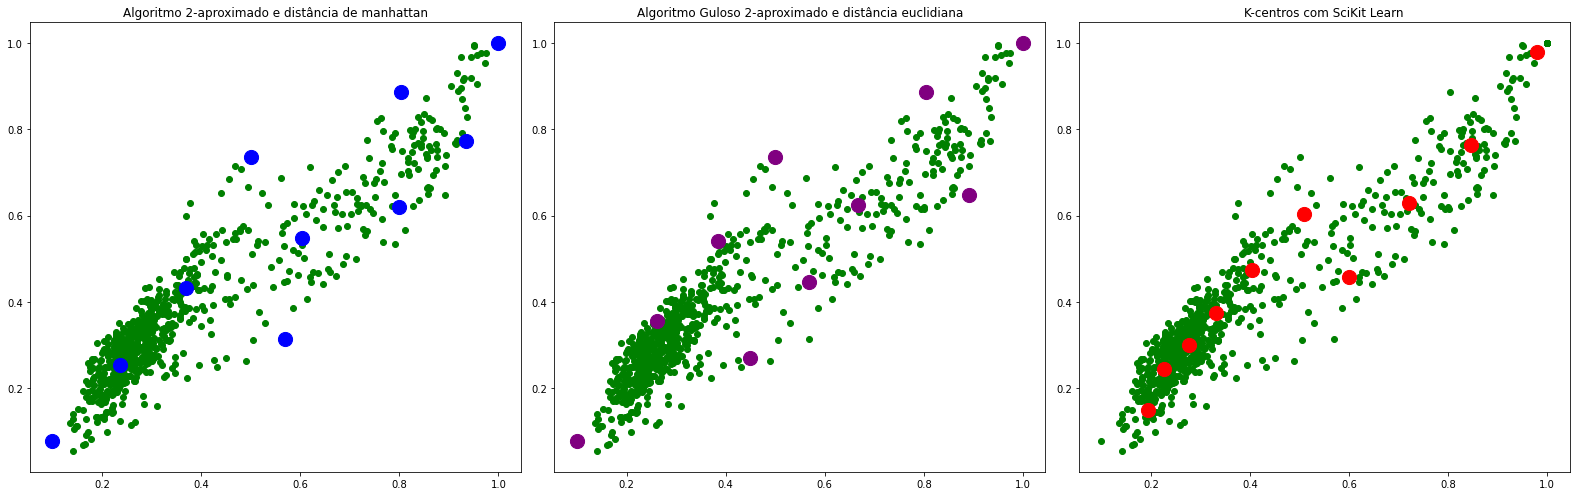

In [929]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

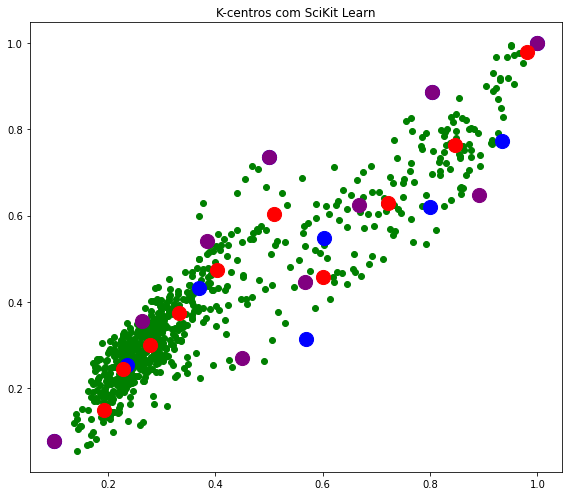

In [930]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [931]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.3890227117995195

### 30 Testes com centros aleatórios

In [932]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,0.115350,0.350145,0.480728,0.074524
0,2.0,0.096991,0.317943,0.399199,0.079463
0,1.0,0.103350,0.388717,0.391564,0.079888
0,2.0,0.097321,0.352260,0.499958,0.076209
0,1.0,0.122600,0.388853,0.447861,0.076550
0,2.0,0.085121,0.392885,0.472444,0.074140
0,1.0,0.117650,0.371053,0.421173,0.078810
0,2.0,0.087638,0.290418,0.428607,0.074948
0,1.0,0.112450,0.355654,0.542760,0.078417
0,2.0,0.096993,0.378505,0.451242,0.076490


Médias e desvio padrão

In [933]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,0.102296,0.011204,0.356401,0.031083,0.450129,0.047927,0.078379,0.004475


## Testes com décimo DataFrame

###Tratamento do DataFrame

In [934]:
df = dataframe10.copy(deep=True)

df.head()

,Repository,Client Server,Abstract Machine,Object Oriented,Function Oriented,Event Driven,Layered,Pipes & Filters,Data centeric,Blackboard,Rule Based,Publish Subscribe,Asynchronous Messaging,Plug-ins,Microkernel,Peer-to-Peer,DomainDriven,Shared Nothing
0,2,9,221,836,96,4,6,53,3,901,160,15,5,2,11,871,3,1
1,2,3,59,99,260,1,5,53,1,627,73,15,1,9,99,825,5,1
2,1,7,236,1343,147,7,4,107,10,1025,101,14,4,8,89,90,5,4
3,1,4,161,1108,195,9,3,150,13,653,93,1,4,9,55,732,5,0
4,4,2,56,149,120,3,10,35,12,1394,100,10,2,6,96,533,2,4


In [935]:
df.describe()

,Repository,Client Server,Abstract Machine,Object Oriented,Function Oriented,Event Driven,Layered,Pipes & Filters,Data centeric,Blackboard,Rule Based,Publish Subscribe,Asynchronous Messaging,Plug-ins,Microkernel,Peer-to-Peer,DomainDriven,Shared Nothing
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.366000,5.442000,148.846000,744.040000,151.434000,8.051000,8.039000,75.888000,10.661000,769.25000,80.915000,10.547000,5.420000,5.573000,52.098000,480.816000,2.971000,2.491000
std,2.847833,2.965034,86.174976,435.757418,85.656434,6.326802,4.284371,44.008456,5.708122,429.60887,46.368608,5.875228,2.815231,2.891891,28.412879,289.923144,1.431156,1.703767
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,75.000000,351.750000,80.000000,4.000000,4.000000,37.000000,6.000000,392.75000,40.000000,5.750000,3.000000,3.000000,27.000000,231.000000,2.000000,1.000000
50%,5.000000,5.000000,151.500000,745.500000,155.000000,8.000000,8.000000,78.000000,11.000000,768.00000,80.000000,11.000000,5.000000,6.000000,53.000000,476.500000,3.000000,3.000000
75%,8.000000,8.000000,219.000000,1123.000000,223.250000,11.000000,12.000000,115.000000,15.000000,1135.00000,122.000000,16.000000,8.000000,8.000000,76.000000,720.000000,4.000000,4.000000
max,10.000000,10.000000,350.000000,1500.000000,300.000000,156.000000,15.000000,156.000000,20.000000,1500.00000,160.000000,20.000000,10.000000,10.000000,100.000000,1000.000000,8.000000,5.000000


Removendo valores discrepantes, reduzindo randomicamente a quantidade de amostras para 1000 e utilizando colunas 'Abstract Machine' e 'Function Oriented'

In [936]:
df.rename(columns = {'Abstract Machine':'Coluna 1', 'Function Oriented':'Coluna 2'}, inplace = True)

In [937]:
df

,Repository,Client Server,Coluna 1,Object Oriented,Coluna 2,Event Driven,Layered,Pipes & Filters,Data centeric,Blackboard,Rule Based,Publish Subscribe,Asynchronous Messaging,Plug-ins,Microkernel,Peer-to-Peer,DomainDriven,Shared Nothing
0,2,9,221,836,96,4,6,53,3,901,160,15,5,2,11,871,3,1
1,2,3,59,99,260,1,5,53,1,627,73,15,1,9,99,825,5,1
2,1,7,236,1343,147,7,4,107,10,1025,101,14,4,8,89,90,5,4
3,1,4,161,1108,195,9,3,150,13,653,93,1,4,9,55,732,5,0
4,4,2,56,149,120,3,10,35,12,1394,100,10,2,6,96,533,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,4,242,313,174,15,6,41,12,244,130,15,2,4,66,303,2,4
996,4,1,273,871,200,3,5,122,4,443,115,15,2,10,85,932,1,3
997,6,8,163,944,172,1,3,18,20,173,122,20,7,4,55,441,2,1
998,1,3,11,339,278,15,9,141,17,745,106,16,8,7,33,31,3,3


In [938]:
df = df[['Coluna 1','Coluna 2']]
df = df.sample(n=750, random_state = 17)
df.head()

,Coluna 1,Coluna 2
786,259,81
499,168,226
930,193,133
217,295,231
803,63,246


###Executando algoritmos de posicionamento de k-centros

Tratando o DataFrame como um numpy array e calculando a matriz de distâncias de manhattan e euclidiana, com p=1 e p=2


In [939]:
array = df.to_numpy()
dist_manhattan = np.zeros((array.shape[0], array.shape[0]))
dist_euclidiana = np.zeros((array.shape[0], array.shape[0]))

iterationsx = 0
for x in array:
  iterationsy = 0
  for y in array:
    dist_manhattan[iterationsx][iterationsy] = minkowski_distance(x,y,1)
    dist_euclidiana[iterationsx][iterationsy] = minkowski_distance(x,y,2)
    iterationsy += 1
  iterationsx += 1


Encontrando os K-centros com o algoritmo guloso com distância de Manhattan(p=1)

In [940]:
centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
print(centers_manhattan, index_centers_manhattan, raio_manhattan)

[[269 199]
 [  5  11]
 [ 50 287]
 [233   2]
 [122 125]
 [  1 168]
 [198 299]
 [350 268]
 [292  85]
 [144 227]] [558 238 110 551 698 659 695  72 620 427] 62.0


Encontrando os K-centros com o algoritmo guloso com distância euclidiana (p=2)

In [941]:
centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
print(centers_euclidiana, index_centers_euclidiana, raio_euclidiana,)

[[218 218]
 [  5  11]
 [  5 289]
 [300  10]
 [158  73]
 [350 268]
 [ 28 150]
 [122 291]
 [293 126]
 [127 171]] [712 238 350 347 733  72  12 375 215 216] 50.601383380299005


Encontrando ok K-centros com SciKit Learn

In [942]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(df[['Coluna 1', 'Coluna 2']])

In [943]:
print(kmeans.cluster_centers_)

[[ 33.17142857  88.42857143]
 [173.37878788 256.10606061]
 [157.88421053 168.70526316]
 [259.54901961  41.1372549 ]
 [ 69.76712329 261.02739726]
 [183.91304348  63.44927536]
 [249.38666667 133.48      ]
 [103.81012658  51.81012658]
 [259.34883721 241.12790698]
 [ 47.54651163 180.11627907]]


Plotando os centros encontrados pelo algoritmo guloso e pelo K-means do SciKit Learn, respectivamente

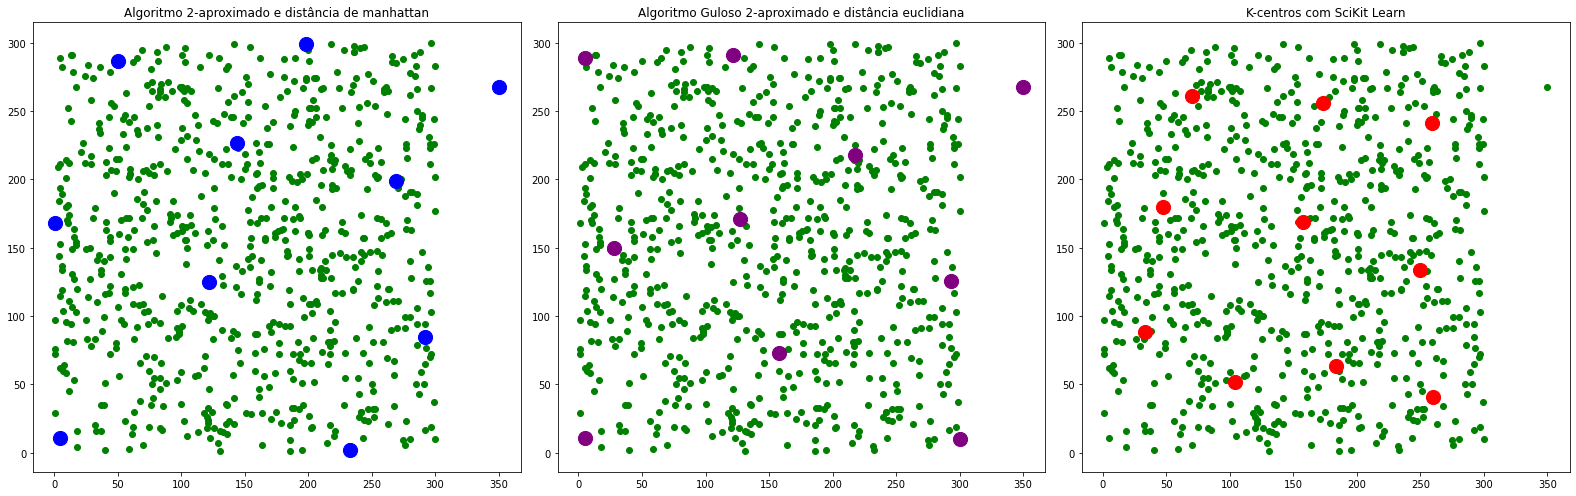

In [944]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
axes[0].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes[0].scatter(center[0],center[1], s = 200, c = "blue")
axes[0].title.set_text("Algoritmo 2-aproximado e distância de manhattan")

axes[1].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_euclidiana:
  axes[1].scatter(center[0],center[1], s = 200, c = "purple")
axes[1].title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

axes[2].scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in kmeans.cluster_centers_:
  axes[2].scatter(center[0],center[1], s = 200, c = "red")
axes[2].title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

Plotando os 3 modelos juntos

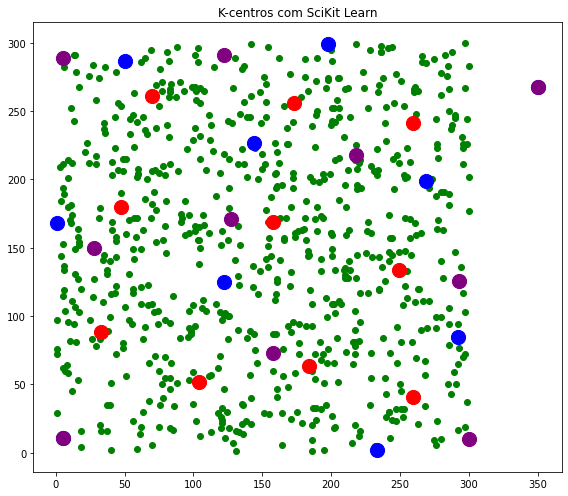

In [945]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
axes.scatter(df[['Coluna 1']],df[['Coluna 2']], c = "green")
for center in centers_manhattan:
  axes.scatter(center[0],center[1], s = 200, c = "blue")
axes.title.set_text("Algoritmo 2-aproximado e distância de manhattan")

for center in centers_euclidiana:
  axes.scatter(center[0],center[1], s = 200, c = "purple")
axes.title.set_text("Algoritmo Guloso 2-aproximado e distância euclidiana")

for center in kmeans.cluster_centers_:
  axes.scatter(center[0],center[1], s = 200, c = "red")
axes.title.set_text("K-centros com SciKit Learn")
fig.tight_layout()

In [946]:
silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)

0.24454467191002882

### 30 Testes com centros aleatórios

In [947]:
df_resultado = pd.DataFrame({"Valor de p":[], "Raio":[],"Silhueta":[], "Indice de Rand":[], "Tempo de execução":[]})
for i in range(30):
  start_time = time.time()
  if i%2==0:
    p=1
    centers_manhattan, index_centers_manhattan, raio_manhattan, label_manhattan = encontra_k_centros(array,10,dist_manhattan)
    raio = raio_manhattan
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_manhattan)
    rand = adjusted_rand_score(kmeans.labels_, label_manhattan)
  else:
    p=2
    centers_euclidiana, index_centers_euclidiana, raio_euclidiana, label_euclidiana = encontra_k_centros(array,10,dist_euclidiana)
    raio = raio_euclidiana
    sil = silhouette_score(df[['Coluna 1', 'Coluna 2']], label_euclidiana)
    rand = adjusted_rand_score(kmeans.labels_, label_euclidiana)
  total_time = time.time() - start_time
  df_iteracao = pd.DataFrame({"Valor de p":[p], "Raio":[raio],"Silhueta":[sil], "Indice de Rand":[rand],  "Tempo de execução":[total_time]})
  df_resultado = df_resultado.append(df_iteracao)
  
df_resultado

,Valor de p,Raio,Silhueta,Indice de Rand,Tempo de execução
0,1.0,65.500000,0.235386,0.359993,0.077763
0,2.0,54.002315,0.258555,0.404471,0.077072
0,1.0,68.500000,0.254590,0.375187,0.074502
0,2.0,51.002451,0.252250,0.493056,0.074800
0,1.0,61.500000,0.230796,0.412895,0.075062
0,2.0,47.856556,0.226157,0.380820,0.080661
0,1.0,60.500000,0.258640,0.412138,0.075579
0,2.0,51.696228,0.251979,0.372790,0.079065
0,1.0,68.500000,0.252616,0.392985,0.077875
0,2.0,51.927835,0.260518,0.417954,0.095655


Médias e desvio padrão

In [948]:
df_media_dp = pd.DataFrame({"Média Raio":[df_resultado['Raio'].mean()],"Desvio Padrão Raio":[df_resultado['Raio'].std()], "Média Silhueta": [df_resultado['Silhueta'].mean()], "Desvio Padrão Silhueta": [df_resultado['Silhueta'].std()], "Média Indice de Rand":[df_resultado['Indice de Rand'].mean()],"Desvio Padrão Rand": [df_resultado['Indice de Rand'].std()], "Média de Tempo":[df_resultado['Tempo de execução'].mean()],"Desvio Padrão de Tempo": [df_resultado['Tempo de execução'].std()]})
df_media_dp

,Média Raio,Desvio Padrão Raio,Média Silhueta,Desvio Padrão Silhueta,Média Indice de Rand,Desvio Padrão Rand,Média de Tempo,Desvio Padrão de Tempo
0,57.306126,7.902398,0.257213,0.013852,0.419376,0.04529,0.078623,0.004628
